In [1]:
import numpy as np
from PIL import Image

我想到原理了，间隔一段距离添加噪声，然后补全连接点形成曲线

In [ ]:
def draw_basic():
  w,h=32,32
  image = Image.new('RGB', (w, h), color='white')
  pixels = image.load()
  image.save('saw.png')
draw_basic()

下面的噪声如果直接用plt进行绘图会自动推理一条连续的曲线，但是实际上是因为自动推理的函数写得好的原因，天涯海角都能给你连上

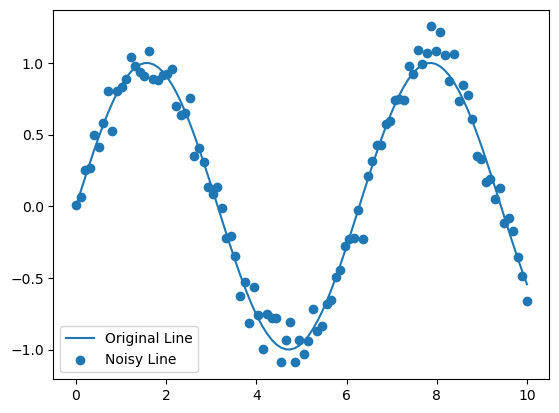

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 原始数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 噪音参数
mu, sigma = 0, 0.1  # 平均值和标准差

# 添加高斯噪音
noise = np.random.normal(mu, sigma, size=y.shape)
y_noisy = y + noise

# 绘制图像
plt.plot(x, y, label='Original Line')
plt.scatter(x, y_noisy, label='Noisy Line')
plt.legend()
plt.show()


新的问题是，如何选取有代表性的点用来取缔之前的连续曲线（绘制锯齿线需要连续取点）

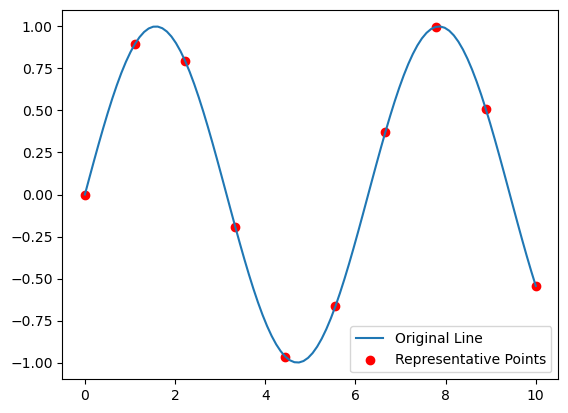

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 原始数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 选择等间距的代表性点
num_points = 10
indices = np.linspace(0, len(x) - 1, num_points, dtype=int)
x_rep = x[indices]
y_rep = y[indices]

# 绘制图像
plt.plot(x, y, label='Original Line')
plt.scatter(x_rep, y_rep, color='red', label='Representative Points')
plt.legend()
plt.show()


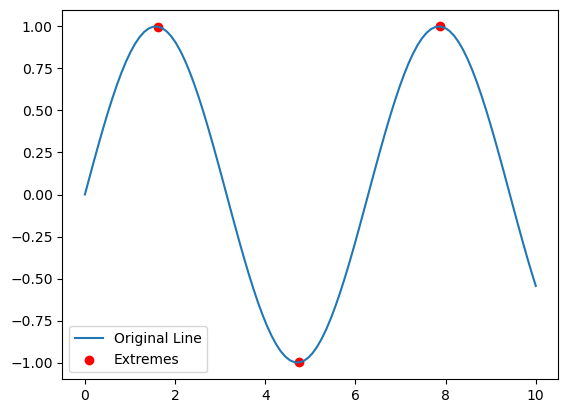

In [7]:
from scipy.signal import find_peaks

# 原始数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 找到局部最大值和最小值
peaks, _ = find_peaks(y)
troughs, _ = find_peaks(-y)

# 合并极值点
extremes = np.sort(np.concatenate([peaks, troughs]))
x_ext = x[extremes]
y_ext = y[extremes]

# 绘制图像
plt.plot(x, y, label='Original Line')
plt.scatter(x_ext, y_ext, color='red', label='Extremes')
plt.legend()
plt.show()


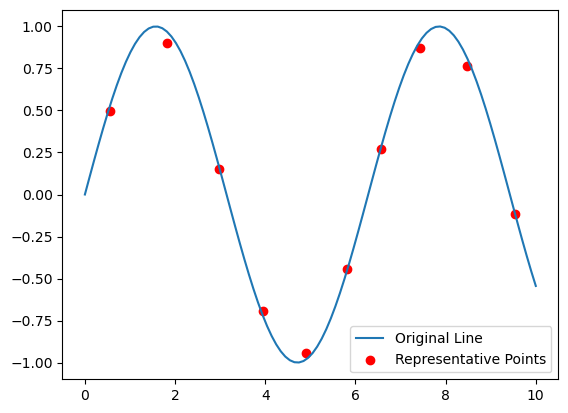

In [8]:
from sklearn.cluster import KMeans

# 原始数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# K-means 聚类选择代表性点
points = np.vstack((x, y)).T
kmeans = KMeans(n_clusters=10).fit(points)
rep_points = kmeans.cluster_centers_

# 绘制图像
plt.plot(x, y, label='Original Line')
plt.scatter(rep_points[:, 0], rep_points[:, 1], color='red', label='Representative Points')
plt.legend()
plt.show()


上面的里面聚类算法效果可以，运算应该也不会慢